In [3]:
import csv
import numpy as np
import math

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file = open("/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/230830/code - update/Iris.csv", "r")
dataset = csv.reader(file)
dataset = np.array(list(dataset))
dataset = np.delete(dataset, 0, 0)
dataset = np.delete(dataset, 0, 1)
file.close()

trainingSet = dataset[:149]
testingSet = dataset[149:]


In [6]:
def computeDistance(dataPoint1, dataPoint2):
  result = 0
  for i in range(4):
    result += (float(dataPoint1[i]) - float(dataPoint2[i]))**2
  return math.sqrt(result)


In [7]:
def computeKnearestNeighbor(trainingSet, item, k):
  distances = []
  for dataPoint in trainingSet:
    distances.append(
        {
            "label": dataPoint[-1],
            "value": computeDistance(item, dataPoint)
        }
    )
  distances.sort(key=lambda x: x["value"])
  labels = [item["label"] for item in distances]
  return labels[:k]

In [8]:
def voteTheDistances(array):
  labels = set(array)
  result = ""
  maxOccur = 0
  for label in labels:
    num = array.count(label)
    if(num > maxOccur):
      maxOccur = num
      result = label

  return result

In [9]:
k = 5
# print(testingSet)
for item in testingSet:
  knn = computeKnearestNeighbor(trainingSet, item, k)
  result = voteTheDistances(knn)
  print("GT = ", item[-1], ", Prediction: =", result)

GT =  Iris-virginica , Prediction: = Iris-virginica


### How to select K in K-NN

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the dataset in
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test)
y_pred != y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [17]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(y_test, y_pred),2))

0.97


In [18]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Accuracy')

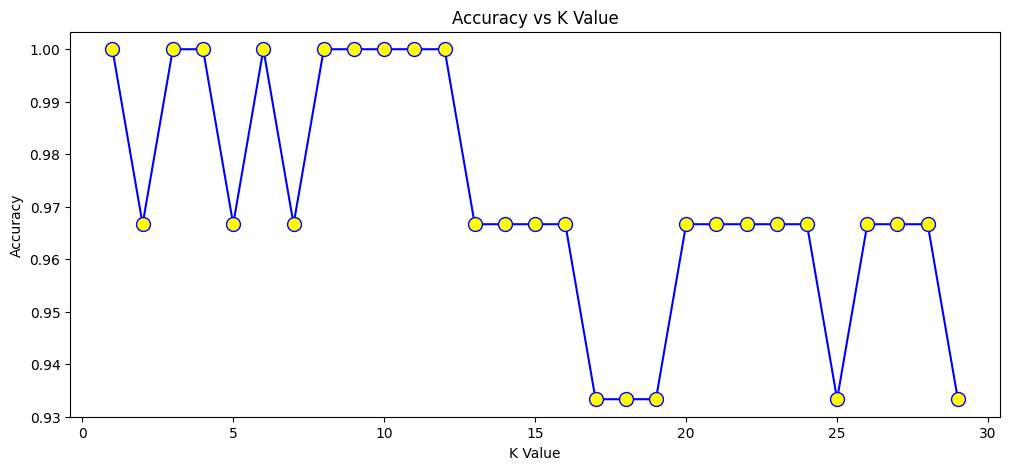

In [19]:
error = []
# Calculating accuracy for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(accuracy_score(pred_i,y_test))

plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

### Problem with K odd and even

In [20]:
#Required Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [22]:
penguin= pd.read_csv("/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/230830/code - update/penguins.csv")
penguin.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [23]:
x = penguin[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = penguin[['species']]

In [24]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 4)

In [25]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #Sort the list by distance
        distance.sort()

        #Get the row index of its nearest neighbour
        neighbours = []

        for j in range(k):
            neighbours.append(distance[j][1])

        #Append the actual target in a list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t,0) + 1

        #Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))

        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            #print('Arranging in decreasing order: ',even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    #print('Value with the least distance classifies: ',y_train[j][0])
                    #print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])

    return(pred)

In [27]:
n = 2
pred = knn_modified(X_train,y_train,X_test,k=n)
neighbors = list(range(1,11))
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy =  accuracy_score(y_test, pred)
    scores.append(accuracy)

scores1 = []
neighbors = list(range(1,11))
for i in neighbors:
    pred = knn_modified(X_train,y_train,X_test,k=i)
    accuracy =  accuracy_score(y_test, pred)
    scores1.append(accuracy)

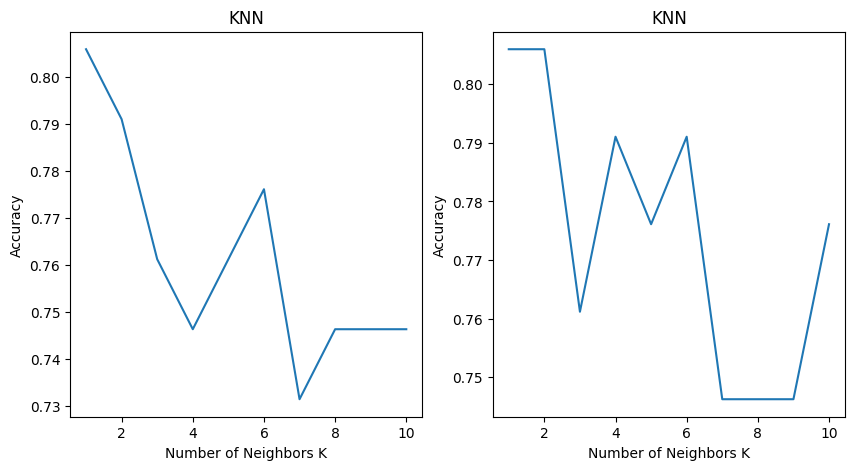

In [28]:
MSE = [ x for x in scores]
plt.figure(figsize=(10, 5))
MSE1 = [ x for x in scores1]
plt.subplot(1,2,1)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.subplot(1,2,2)
plt.plot(neighbors, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()

In [29]:
from sklearn import datasets

dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [31]:
classifier = KNeighborsClassifier(n_neighbors=8, weights = 'uniform', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [32]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 94.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      0.97      0.94        30
           2       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [33]:
classifier = KNeighborsClassifier(n_neighbors=8, p = 2, weights="distance")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [34]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 96.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [35]:
def customizeWeight(distances):
  sigma = 0.5
  return np.exp(-distances**2/sigma)

In [36]:
classifier = KNeighborsClassifier(n_neighbors=4, p = 2, weights=customizeWeight)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 93.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75

